In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns
import os
from datetime import datetime, timedelta

In [2]:
# Step 1: Load data
combined = pd.read_csv('../data/processed/combined_data.csv', index_col='Date', parse_dates=True)
end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

In [3]:
# Step 2: Calculate returns
returns = combined.pct_change().dropna()

In [4]:
#Step 3: Portfolio optimization
mu = expected_returns.mean_historical_return(combined, returns_data=False, frequency=252)
S = risk_models.sample_cov(combined, returns_data=False, frequency=252)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()  # Maximize Sharpe ratio
cleaned_weights = ef.clean_weights()
print("Portfolio Weights:", cleaned_weights)

Portfolio Weights: OrderedDict({'TSLA': 0.09935, 'BND': 0.0, 'SPY': 0.90065})


In [5]:
# Step 4: Portfolio performance
ret, vol, sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 14.9%
Annual volatility: 19.4%
Sharpe Ratio: 0.67


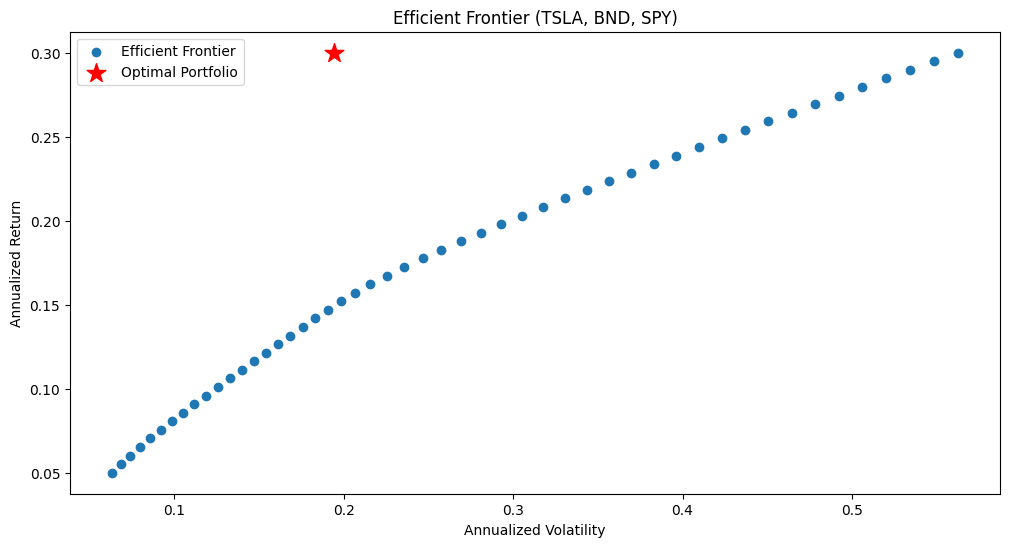

In [6]:
# Step 5: Efficient frontier
ef_frontier = EfficientFrontier(mu, S)
frontier = []
target_returns = np.linspace(0.05, 0.3, 50)
for ret in target_returns:
    ef_frontier.efficient_return(target_return=ret)
    frontier.append((ef_frontier.portfolio_performance()[1], ret))

# Plot efficient frontier
frontier = np.array(frontier)
plt.figure(figsize=(12,6))
plt.scatter(frontier[:,0], frontier[:,1], label='Efficient Frontier', marker='o')
plt.scatter(vol, ret, color='red', marker='*', s=200, label='Optimal Portfolio')
plt.title('Efficient Frontier (TSLA, BND, SPY)')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.savefig('../reports/figures/efficient_frontier.png')
plt.show()

# Save weights
pd.Series(cleaned_weights).to_csv('../data/processed/portfolio_weights.csv')